Step 1/2: 
Read the dataset into a Pandas DataFrame! 

Does the dataset include any missing values? If so, delete the missing value entries! 

(This also helps me set up for later by preparing some of the commands I knew I would need later and shows an unmodified 
version of the dataset after having NaN values removed)

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
df=pd.read_csv('flavors_of_cacao.csv')
sca = StandardScaler()
enc = LabelEncoder()
oenc = OneHotEncoder()
df.dropna(inplace=True,axis=0) #Drops missing values

df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


Step 3.1:

How many tuples are there in the dataset?

Uses the len() command to count the amount of Tuples in the dataset

In [2]:
print("There are",len(df),"different Tuples")

There are 1793 different Tuples


Step 3.2:
    
How many unique company names are there in the dataset?

Assings the column to the variable Company and runs it through n.unique() to find the amount of unique Company Names

In [3]:
Company= df.iloc[:, 0]
print("There are ",Company.nunique(),"different Company Names")

There are  416 different Company Names


Step 3.3:

How many reviews are made in 2013 in the dataset?

Using a different method to Question 3, does not assign a variable for the column but rather the result of counting all 2013's in the column 'Review\nDate'

In [4]:
review =df['Review\nDate'].value_counts()[2013]
print("There are a whopping",review,"total reviews from 2013")

There are a whopping 184 total reviews from 2013


Step 3.4:

In the BeanType Column, how many missing values are there?

Using replace, I remove the missing values in the Bean type column and assign them as NaN at which point I calculate the total amount of NaN inside of the column by using the isna().sum() command after assigning the column to a variable

In [14]:
df=df.replace(r'^\s*$', np.nan, regex=True)
Beans = df.iloc[:, 7]
print("There are ",(Beans.isna().sum()), "total missing values in the Bean Type column")

There are  887 total missing values in the Bean Type column


Step 4.1 and Step 4.2:

Visualize the rating column with a histogram!

Comment on the resulting figure!

Puts the labels "User Ratings" and "Total Votes" to indicate how many votes were tallied and what ratings were most common.
Surprisingly it seems that while it is incredibly hard to make fantastic chocolate(in my opinion a 4 or more), it seems it is much more noticeable to notice when a chocolate is terrible

The reviewer seems to not really care much about the different chocolate's taste,
though it seems its much more noticeable if it tastes bad


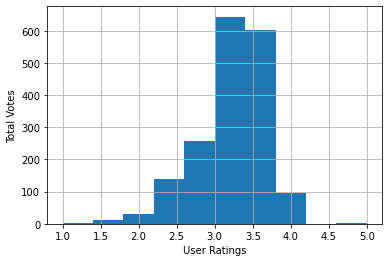

In [6]:
plt.xlabel("User Ratings")
plt.ylabel("Total Votes")
df['Rating'].hist()
print("The reviewer seems to not really care much about the different chocolate's taste,\nthough it seems its much more noticeable if it tastes bad")

Step 4.3:

Convert the Column Percent

Change the type of values in the column percent from string values to numerical values.

Uses str.rstrip to remove the % value from the column 'Cocoa\nPercent' at which point it then converts the numbers into a float and divides them by 100 to get the Percentage Value compared to 1

(Just a note, the pass command is only there to prevent it from crashing on a second run, while theoretically not needed as it would more than likely only be run once and should the percentage column be decided to removed later a lot more would break, all it essentially does is allow this code to be skipped later since using .str on a string breaks ONLY this line of code from running again)

In [7]:
PercChk = df.iloc[:, 4]
if PercChk[0] == 0.63:
    pass
else:
    df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.rstrip("%").astype(float)/100


Step 5:

Plot the converted numerical Cocoa Percent values against the Rating values!

From what you see, does more cocoa in a bar correspond to a higher rating?

Uses a Scatter graph to show the relations between Cocoa Percentages and Ratings. By doing so you can see that while less than 60% or more than 85% generally makes a terrible chocolate bar, inbetween those values generally makes a decent chocolate bar with the best results being in the 70-75% range

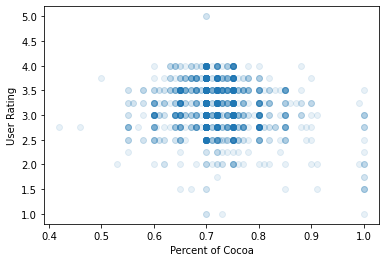

In [15]:
plt.xlabel("Percent of Cocoa")
plt.ylabel("User Rating")
plt.scatter( df['Cocoa\nPercent'], df['Rating'], alpha = 0.1)

Step 6:

Normalize the Rating Column and print the results.

Depending on what result you want, the first one scales the column 'Rating' and simply prints it, while the second one scales the column while leaving it inside of the table so you can see the modified column

In [23]:
ScaEnd = sca.fit_transform(df[['Rating']]).flatten()
print(ScaEnd)

[ 1.18135642 -0.9127336  -0.3892111  ...  0.65783391  0.13431141
 -0.3892111 ]


In [22]:
potato = df.copy()
potato['Rating'] = sca.fit_transform(df[['Rating']]).flatten()
potato

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,1.181356,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,-0.912734,NaN,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,-0.389211,NaN,Togo
3,A. Morin,Akata,1680,2015,0.70,France,0.657834,NaN,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,0.657834,NaN,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,1.181356,NaN,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,-0.389211,Forastero,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,0.657834,Forastero,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,0.134311,NaN,India


Step 8:

Suppose we are interested in the company’s names and locations for some collective analysis. Encode the two categorical columns with the encoder you think is best for the job!

I decided to encode it with label encoding as One Hot Encoding would simply cause it to return it as 1s and 0s not as the (many) individual companys and locations. I also added a quick bit of code to classify them as unique values and add them together so you could properly see the encoded results.

In [10]:
Locale=df.iloc[:, 5]
EncDf=df.copy()
EncCom=enc.fit_transform(Company)
EncLoc=enc.fit_transform(Locale)
uniqueC, countsC = np.unique(EncCom, return_counts=True)
uniqueL, countsL = np.unique(EncLoc, return_counts=True)

In [11]:
print(np.asarray((uniqueC, countsC)).T)

[[  0  23]
 [  1   5]
 [  2   2]
 [  3   4]
 [  4   2]
 [  5   1]
 [  6   3]
 [  7   5]
 [  8   4]
 [  9  10]
 [ 10   9]
 [ 11   4]
 [ 12   2]
 [ 13   6]
 [ 14  13]
 [ 15   1]
 [ 16   1]
 [ 17   4]
 [ 18  22]
 [ 19  16]
 [ 20   1]
 [ 21   6]
 [ 22   5]
 [ 23   2]
 [ 24   5]
 [ 25   1]
 [ 26   3]
 [ 27   2]
 [ 28   4]
 [ 29   4]
 [ 30   3]
 [ 31   3]
 [ 32   6]
 [ 33   1]
 [ 34   8]
 [ 35   4]
 [ 36  14]
 [ 37   3]
 [ 38   1]
 [ 39   2]
 [ 40   6]
 [ 41  27]
 [ 42   2]
 [ 43   2]
 [ 44   9]
 [ 45   6]
 [ 46   1]
 [ 47   4]
 [ 48   1]
 [ 49   1]
 [ 50   5]
 [ 51   7]
 [ 52   1]
 [ 53   4]
 [ 54   5]
 [ 55   7]
 [ 56   1]
 [ 57   4]
 [ 58   9]
 [ 59   3]
 [ 60   6]
 [ 61   1]
 [ 62   1]
 [ 63   4]
 [ 64   2]
 [ 65   5]
 [ 66   6]
 [ 67   2]
 [ 68   5]
 [ 69   5]
 [ 70  14]
 [ 71   4]
 [ 72   1]
 [ 73   1]
 [ 74   1]
 [ 75   2]
 [ 76   1]
 [ 77   1]
 [ 78   1]
 [ 79   2]
 [ 80   2]
 [ 81   1]
 [ 82   2]
 [ 83   3]
 [ 84   2]
 [ 85   7]
 [ 86   1]
 [ 87   3]
 [ 88   6]
 [ 89   1]
 [ 90   1]

In [12]:
print(np.asarray((uniqueL, countsL)).T)

[[  0   4]
 [  1   9]
 [  2  49]
 [  3  26]
 [  4  40]
 [  5   2]
 [  6  17]
 [  7 124]
 [  8   2]
 [  9  23]
 [ 10   9]
 [ 11   1]
 [ 12  15]
 [ 13   5]
 [ 14  54]
 [ 15   1]
 [ 16   4]
 [ 17   2]
 [ 18 156]
 [ 19  35]
 [ 20   1]
 [ 21   3]
 [ 22  10]
 [ 23   6]
 [ 24  22]
 [ 25   3]
 [ 26   1]
 [ 27   4]
 [ 28   9]
 [ 29  63]
 [ 30  17]
 [ 31   6]
 [ 32  17]
 [ 33   1]
 [ 34   4]
 [ 35   4]
 [ 36  17]
 [ 37   1]
 [ 38   5]
 [ 39  17]
 [ 40   1]
 [ 41   8]
 [ 42   3]
 [ 43   4]
 [ 44   1]
 [ 45   4]
 [ 46  10]
 [ 47   3]
 [ 48   3]
 [ 49   5]
 [ 50  25]
 [ 51   2]
 [ 52   1]
 [ 53   5]
 [ 54  38]
 [ 55  96]
 [ 56 763]
 [ 57  20]
 [ 58  11]
 [ 59   1]]
